In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from matplotlib import style
import seaborn as sns
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("student_mat.csv", sep=";")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Data analysis

In [5]:
df_analysis = data[["sex", "age", "traveltime","absences","freetime","studytime", "schoolsup", "health","failures","activities", "internet", "paid", "Fjob", "Mjob", "G1", "G2", "G3"]]

df_analysis.head()


,sex,age,traveltime,absences,freetime,studytime,schoolsup,health,failures,activities,internet,paid,Fjob,Mjob,G1,G2,G3
0,F,18,2,6,3,2,yes,3,0,no,no,no,teacher,at_home,5,6,6
1,F,17,1,4,3,2,no,3,0,no,yes,no,other,at_home,5,5,6
2,F,15,1,10,3,2,yes,3,3,no,yes,yes,other,at_home,7,8,10
3,F,15,1,2,2,3,no,5,0,yes,yes,yes,services,health,15,14,15
4,F,16,1,4,3,2,no,5,0,no,no,yes,other,other,6,10,10


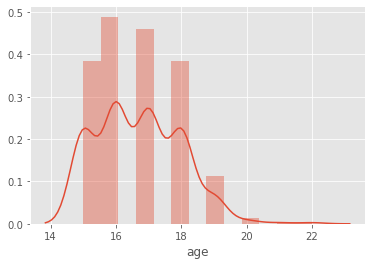

In [6]:
sns.distplot(df_analysis["age"], kde=True)

#### Maximum age students in the class is between 15 to 16

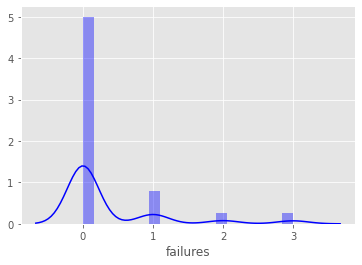

In [7]:
sns.distplot(df_analysis["failures"], kde=True, color="b")

#### Number of failures in the class is less 

## Graph showing absences related to age

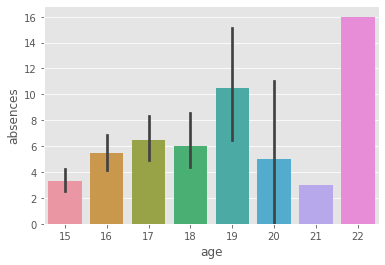

In [8]:
# health - current health status (numeric: from 1 - very bad to 5 - very good)
sns.barplot(x="age", y="absences", data=df_analysis)

#### The above graph shows that absences is maximum in the age 22 

##  Graphs showing absences affecting marks 

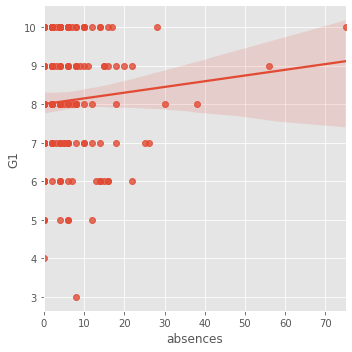

In [9]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G1']< df_analysis['G1'].quantile(0.5)]
# plotting grpah
graph = sns.lmplot(x="absences", y="G1", data=df_analysis)

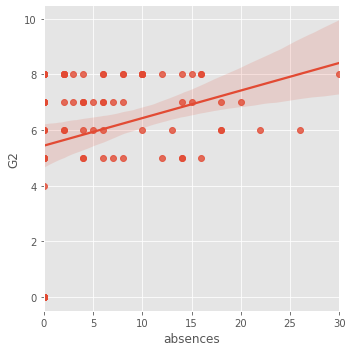

In [10]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G2']< df_analysis['G2'].quantile(0.5)]
# ploting graph
graph = sns.lmplot(x="absences", y="G2", data=df_analysis)

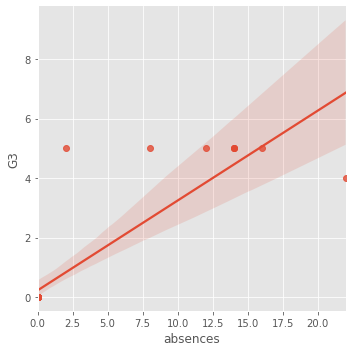

In [11]:

# remove outliers
df_analysis = df_analysis.loc[df_analysis['G3']< df_analysis['G3'].quantile(0.5)]
# plotting graph
graph = sns.lmplot(x="absences", y="G3", data=df_analysis)

#### We can clearly say that absence in class is somewhat related to lower marks obtained by students

## Final Marks prediction

In [12]:
df = data[["G1", "G2", "G3", "absences","studytime", "freetime", "health"]]

In [13]:
df.head()

,G1,G2,G3,absences,studytime,freetime,health
0,5,6,6,6,2,3,3
1,5,5,6,4,2,3,3
2,7,8,10,10,2,3,3
3,15,14,15,2,3,2,5
4,6,10,10,4,2,3,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   absences   395 non-null    int64
 4   studytime  395 non-null    int64
 5   freetime   395 non-null    int64
 6   health     395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB


### predict G3 marks 

In [15]:
predict = "G3"

In [16]:
# y = mx + c

# x will have g1 and g2 value only 
X = np.array(df.drop([predict], 1)) 
print(X)

[[ 5  6  6  2  3  3]
 [ 5  5  4  2  3  3]
 [ 7  8 10  2  3  3]
 ...
 [10  8  3  1  5  3]
 [11 12  0  1  4  5]
 [ 8  9  5  1  2  5]]


In [17]:
# y will have g3 value which we will predict
y = np.array(df[[predict]])
print(y)

[[ 6]
 [ 6]
 [10]
 [15]
 [10]
 [15]
 [11]
 [ 6]
 [19]
 [15]
 [ 9]
 [12]
 [14]
 [11]
 [16]
 [14]
 [14]
 [10]
 [ 5]
 [10]
 [15]
 [15]
 [16]
 [12]
 [ 8]
 [ 8]
 [11]
 [15]
 [11]
 [11]
 [12]
 [17]
 [16]
 [12]
 [15]
 [ 6]
 [18]
 [15]
 [11]
 [13]
 [11]
 [12]
 [18]
 [11]
 [ 9]
 [ 6]
 [11]
 [20]
 [14]
 [ 7]
 [13]
 [13]
 [10]
 [11]
 [13]
 [10]
 [15]
 [15]
 [ 9]
 [16]
 [11]
 [11]
 [ 9]
 [ 9]
 [10]
 [15]
 [12]
 [ 6]
 [ 8]
 [16]
 [15]
 [10]
 [ 5]
 [14]
 [11]
 [10]
 [10]
 [11]
 [10]
 [ 5]
 [12]
 [11]
 [ 6]
 [15]
 [10]
 [ 8]
 [ 6]
 [14]
 [10]
 [ 7]
 [ 8]
 [18]
 [ 6]
 [10]
 [14]
 [10]
 [15]
 [10]
 [14]
 [ 8]
 [ 5]
 [17]
 [14]
 [ 6]
 [18]
 [11]
 [ 8]
 [18]
 [13]
 [16]
 [19]
 [10]
 [13]
 [19]
 [ 9]
 [16]
 [14]
 [13]
 [ 8]
 [13]
 [15]
 [15]
 [13]
 [13]
 [ 8]
 [12]
 [11]
 [ 9]
 [ 0]
 [18]
 [ 0]
 [ 0]
 [12]
 [11]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [12]
 [15]
 [ 0]
 [ 9]
 [11]
 [13]
 [ 0]
 [11]
 [ 0]
 [11]
 [ 0]
 [10]
 [ 0]
 [14]
 [10]
 [ 0]
 [12]
 [ 8]
 [13]
 [10]
 [15]
 [12]
 [ 0]
 [ 7]
 [ 0]
 [10]
 [ 7]
 [12]
 [10

In [18]:
# spliting the data into test and train in the ratio of 90:10
# spliting into four arrays



#### spliting data syntax here should be moved after tranning module

In [19]:

# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state=0)


#### Only best tranied model will get saved 

In [20]:
best = 0
for i in range(30):
    
    # spliting data syntax should be moved out of the loop after tranning and storing trained module.
    # after test_size in for loop should be added not to select random data while splitting. syntax : random_state=0
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()
    

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    # accuracy 
    print("accuracy:", acc)
    
    
    # saving the model: 

    #studentmodel is the name of the model
    #wb mode
    
    if acc>best:
        best=acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f) 

print("best accuracy:",best)

LinearRegression()

accuracy: 0.8919742090995758


LinearRegression()

accuracy: 0.6767263538289994


LinearRegression()

accuracy: 0.8217860579091919


LinearRegression()

accuracy: 0.8912127871521636


LinearRegression()

accuracy: 0.9414645414865914


LinearRegression()

accuracy: 0.7918495486551601


LinearRegression()

accuracy: 0.8753693820415641


LinearRegression()

accuracy: 0.8226642226943517


LinearRegression()

accuracy: 0.7448524896504457


LinearRegression()

accuracy: 0.890918274338319


LinearRegression()

accuracy: 0.7659414178326327


LinearRegression()

accuracy: 0.8350233236503284


LinearRegression()

accuracy: 0.7909622601312281


LinearRegression()

accuracy: 0.8232646316252175


LinearRegression()

accuracy: 0.7276601547840483


LinearRegression()

accuracy: 0.7270083425817246


LinearRegression()

accuracy: 0.9071652676255028


LinearRegression()

accuracy: 0.7730095876449554


LinearRegression()

accuracy: 0.869740866059928


LinearRegression()

accuracy: 0.7945390560861264


LinearRegression()

accuracy: 0.8666531362094065


LinearRegression()

accuracy: 0.8583655425673272


LinearRegression()

accuracy: 0.8020115524728395


LinearRegression()

accuracy: 0.7584050204550827


LinearRegression()

accuracy: 0.8013474893307545


LinearRegression()

accuracy: 0.8369633409946298


LinearRegression()

accuracy: 0.7407735088580822


LinearRegression()

accuracy: 0.7763638919046472


LinearRegression()

accuracy: 0.8250307046539719


LinearRegression()

accuracy: 0.7360081017378906
best accuracy: 0.9414645414865914


#### model is trained and saved. So we commented this section of training the model.

In [21]:
# linear = linear_model.LinearRegression()

In [22]:
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# accuracy 
#print(acc)

In [23]:
# saving the model: 

# studentmodel is the name of the model
# wb mode
# with open("studentmodel.pickle", "wb") as f:
    #pickle.dump(linear, f) 

In [24]:
# loading the pickle file with model so that we do not need to train our model every time
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in) 

In [25]:
print('Coefficient(m): \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient(m): 
 [[ 0.16344546  0.99314171  0.0366933  -0.20730167  0.07537215  0.09159804]]
Intercept: 
 [-2.39718509]


In [30]:
y_pred = linear.predict(x_test)

In [31]:
print(len(y_pred))

40


In [28]:
# print(y_test)

In [32]:
for x in range(len(y_pred)):
    # checking for prerdict output
    print(x_test[x],y_test[x], y_pred[x])
    

[9 9 4 2 4 1] [10] [8.13735589]
[16 18  0  2  4  1] [18] [18.07297627]
[13 13  4  4  3  3] [12] [12.45692515]
[11 13  2  2  4  2] [14] [12.45502508]
[9 8 2 4 5 5] [8] [7.09798858]
[ 9  8 15  2  4  4] [8] [7.82263456]
[10 10  2  2  4  3] [11] [9.40375255]
[12 14  0  1  4  5] [15] [14.02032145]
[10 12  2  1  2  3] [12] [11.44659332]
[6 7 0 2 1 4] [0] [5.56264059]
[12 12  2  1  3  5] [14] [12.03205247]
[10  9  0  2  3  2] [0] [8.17025405]
[ 6  6 22  2  4  1] [4] [5.32807372]
[13 13  2  2  4  5] [11] [13.05671012]
[ 9 10  9  3  3  5] [9] [9.39768242]
[14 15  0  2  2  3] [16] [14.79911202]
[12 12  2  1  2  5] [11] [11.95668032]
[7 8 2 2 4 5] [9] [7.11032884]
[11 12  2  1  3  3] [11] [11.68541093]
[12 10 10  3  2  3] [12] [9.66614386]
[14 13  4  2  4  4] [13] [13.20194413]
[15 13  9  2  4  2] [15] [13.36565998]
[16 15 16  3  4  5] [15] [15.83973438]
[ 7  7 14  1  5  4] [5] [6.74858246]
[ 8  8 30  1  5  5] [8] [8.58386039]
[15 14  8  2  2  4] [14] [14.35456017]
[8 9 4 2 1 3] [10] [7.93099006]

### the easiest way to compare the target and prediction is to plot them of scatter plot

Text(0.5, 0, 'Targets (y_train)')

Text(0, 0.5, 'Predictions (y_pred)')

(0.0, 22.0)

(0.0, 22.0)

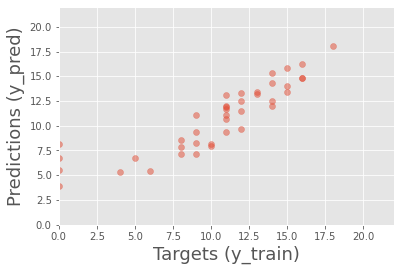

In [35]:
plt.scatter(y_test, y_pred, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()